In [89]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
from cadet import Cadet

In [90]:
# macOS installation path
Cadet.cadet_path = '/Users/hoangnguyen/cadet-core/cadet/bin/cadet-cli'

In [91]:
# Windows installation path
# Cadet.cadet_path = 'C:/Users/hoang/miniconda3/envs/cadet-env/bin/cadet-cli.exe'

In [92]:
# Setting up the model
model = Cadet()
model.root.input.model.nunits = 1

# Forward reaction

In [93]:
# Auxiliary variables
t_cycle = 100

init_c = [1.0, 0.0]
V = 1e-6

kfwd = [0.1]
kbwd = [0.0]

stoich = [-1, 
           1]

n_comp = len(init_c)

In [94]:
# CSTR
model.root.input.model.unit_000.unit_type = 'CSTR'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.init_volume = V
model.root.input.model.unit_000.init_c = init_c

# Reaction
model.root.input.model.unit_000.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_000.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_000.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_000.reaction_bulk.mal_stoichiometry_bulk = stoich 

# Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = []

In [95]:
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [96]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

In [97]:
# Running simulation
model.filename = 'reaction-cstr-1.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


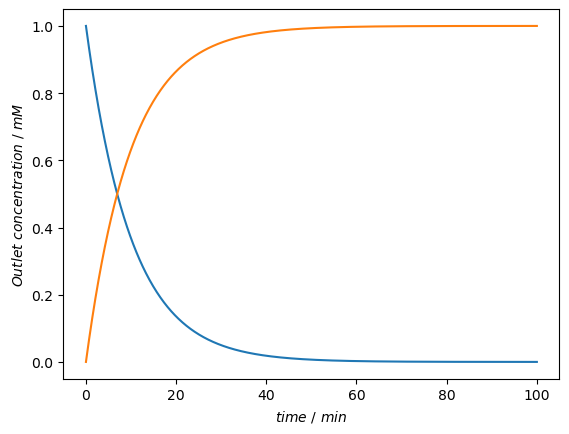

In [98]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_000.solution_bulk
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

# Equilibrium reaction

In [99]:
# Auxiliary variables
t_cycle = 100

init_c = [1.0, 0.0]
V = 1e-6

kfwd = [0.1]
kbwd = [0.01]

stoich = [-2, 
           1]

In [100]:
# CSTR
model.root.input.model.unit_000.unit_type = 'CSTR'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.init_volume = V
model.root.input.model.unit_000.init_c = init_c

# Reaction
model.root.input.model.unit_000.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_000.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_000.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_000.reaction_bulk.mal_stoichiometry_bulk = stoich 

# Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = []

In [101]:
# Running simulation
model.filename = 'reaction-cstr-2.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


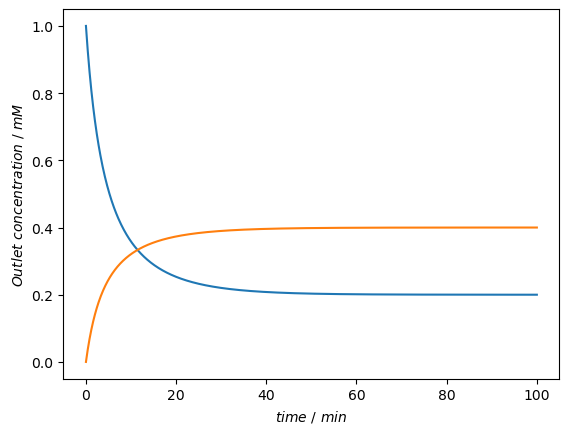

In [102]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_000.solution_bulk
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

In [103]:
# Auxiliary variables
t_cycle = 100

init_c = [1.0, 0.0, 0.0]
V = 1e-6

kfwd = [0.1, 0.25]
kbwd = [0.0, 0.0]

stoich = [-1, -1, 
           1, 0,
           0, 1]

n_comp = len(init_c)

In [104]:
# CSTR
model.root.input.model.unit_000.unit_type = 'CSTR'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.init_volume = V
model.root.input.model.unit_000.init_c = init_c

# Reaction
model.root.input.model.unit_000.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_000.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_000.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_000.reaction_bulk.mal_stoichiometry_bulk = stoich 

# Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = []

In [105]:
# Return data
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1

In [106]:
# Running simulation
model.filename = 'reaction-cstr-3.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


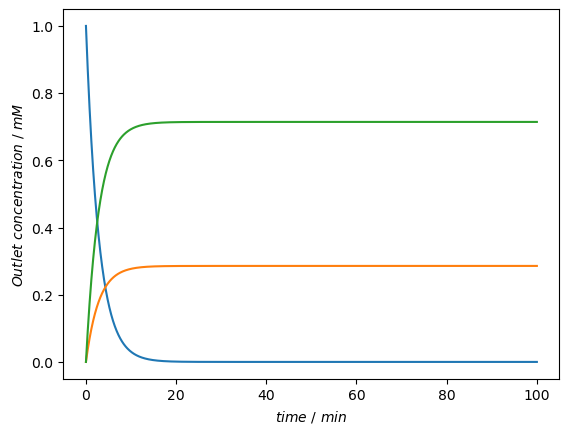

In [107]:
# Plotting the results of the inlet
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_000.solution_bulk
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

# PFR

In [120]:
# Setting up the model
model = Cadet()
model.root.input.model.nunits = 3
from addict import Dict


In [121]:
# Auxiliary variables
t_cycle = 120

c_feed = [1.0, 0.0]
Q = 1e-3

kfwd = [0.1]
kbwd = [0.01]

stoich = [-2, 
          1]

In [122]:
n_comp = len(c_feed)

# Unit Operations
## Inlet
model.root.input.model.unit_000.unit_type = 'INLET'
model.root.input.model.unit_000.ncomp = n_comp
model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# Tubular reactor
model.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITH_PORES'
model.root.input.model.unit_001.ncomp = n_comp
model.root.input.model.unit_001.col_length = 0.5
model.root.input.model.unit_001.cross_section_area = 0.1
model.root.input.model.unit_001.col_porosity = 1
model.root.input.model.unit_001.par_porosity = 1
model.root.input.model.unit_001.par_radius = 1e-6
model.root.input.model.unit_001.col_dispersion = 0
model.root.input.model.unit_001.film_diffusion = n_comp*[0]
model.root.input.model.unit_001.init_c = n_comp*[0]

## Reaction
model.root.input.model.unit_001.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_001.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_001.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_001.reaction_bulk.mal_stoichiometry_bulk = stoich

## Outlet
model.root.input.model.unit_002.unit_type = 'OUTLET'
model.root.input.model.unit_002.ncomp = n_comp

In [123]:
model.root.input.model.solver.gs_type = 1
model.root.input.model.solver.max_krylov = 0
model.root.input.model.solver.max_restarts = 10
model.root.input.model.solver.schur_safety = 1e-8

# Number of cores for parallel simulation
model.root.input.solver.nthreads = 1

# Tolerances for the time integrator
model.root.input.solver.time_integrator.abstol = 1e-6
model.root.input.solver.time_integrator.algtol = 1e-10
model.root.input.solver.time_integrator.reltol = 1e-6
model.root.input.solver.time_integrator.init_step_size = 1e-6
model.root.input.solver.time_integrator.max_steps = 1000000

In [124]:
# Discretization
# Grid cells
model.root.input.model.unit_001.discretization.ncol = 20
model.root.input.model.unit_001.discretization.npar = 5
model.root.input.model.unit_001.discretization.npartype = 1

# Bound states
model.root.input.model.unit_001.discretization.nbound = n_comp*[0.0]

# Other options
model.root.input.model.unit_001.discretization.par_disc_type = 'EQUIDISTANT_PAR'
model.root.input.model.unit_001.discretization.use_analytic_jacobian = 1
model.root.input.model.unit_001.discretization.reconstruction = 'WENO'
model.root.input.model.unit_001.discretization.gs_type = 1
model.root.input.model.unit_001.discretization.max_krylov = 0
model.root.input.model.unit_001.discretization.max_restarts = 10
model.root.input.model.unit_001.discretization.schur_safety = 1.0e-8

# Weno options
model.root.input.model.unit_001.discretization.weno.boundary_model = 0
model.root.input.model.unit_001.discretization.weno.weno_eps = 1e-10
model.root.input.model.unit_001.discretization.weno.weno_order = 3

In [125]:
## Reaction
model.root.input.model.unit_001.reaction_model = 'MASS_ACTION_LAW'
model.root.input.model.unit_001.reaction_bulk.mal_kfwd_bulk = kfwd
model.root.input.model.unit_001.reaction_bulk.mal_kbwd_bulk = kbwd
model.root.input.model.unit_001.reaction_bulk.mal_stoichiometry_bulk = stoich

## Outlet
model.root.input.model.unit_002.unit_type = 'OUTLET'
model.root.input.model.unit_002.ncomp = n_comp

## Sections and Switches
model.root.input.solver.sections.nsec = 1
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.sections.section_continuity = []
model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

model.root.input.model.unit_000.sec_000.const_coeff = c_feed

model.root.input.model.connections.nswitches = 1
model.root.input.model.connections.switch_000.section = 0
model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, Q,
    1, 2, -1, -1, Q
]

In [126]:
# Store solution
model.root.input['return'].split_components_data = 0
model.root.input['return'].split_ports_data = 0
model.root.input['return'].unit_000.write_solution_inlet = 1
model.root.input['return'].unit_000.write_solution_outlet = 1
model.root.input['return'].unit_000.write_solution_bulk = 1
model.root.input['return'].unit_000.write_solution_particle = 1
model.root.input['return'].unit_000.write_solution_solid = 1
model.root.input['return'].unit_000.write_solution_flux = 1
model.root.input['return'].unit_000.write_solution_volume = 1
model.root.input['return'].unit_000.write_coordinates = 1
model.root.input['return'].unit_000.write_sens_outlet = 1

# Copy settings to the other unit operations
model.root.input['return'].unit_001 = model.root.input['return'].unit_000
model.root.input['return'].unit_002 = model.root.input['return'].unit_000

In [127]:
# Running simulation
model.filename = 'reaction-pfr.h5'
model.save()

data = model.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    model.load()
else:
    print(data)
    raise Exception("Simulation failed")

Simulation completed successfully


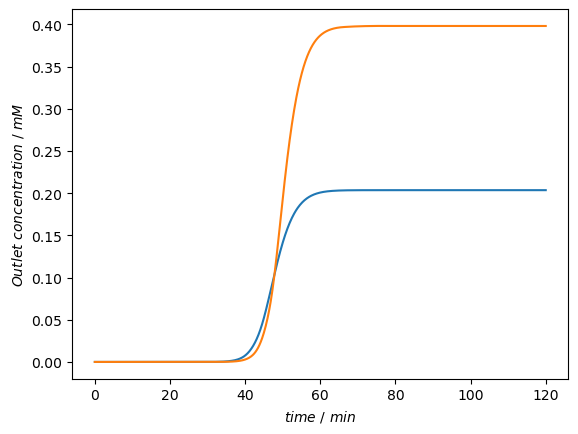

In [128]:
plt.figure()
time = model.root.output.solution.solution_times
c = model.root.output.solution.unit_001.solution_outlet
plt.plot(time, c)
plt.xlabel('$time~/~min$')
plt.ylabel('$Outlet~concentration~/~mM$')
plt.show()

In [129]:
z = model.root.output.coordinates.unit_001.axial_coordinates
c = model.root.output.solution.unit_001.solution_bulk[-1,:,:]

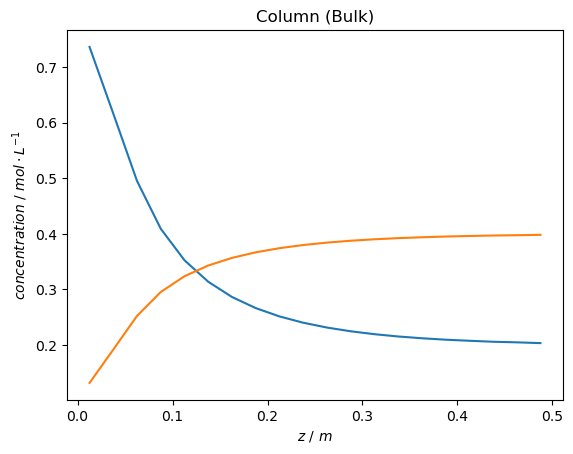

In [130]:
plt.figure()
plt.plot(z, c)
plt.title('Column (Bulk)')
plt.xlabel('$z~/~m$')
plt.ylabel('$concentration~/~mol \cdot L^{-1} $')
plt.show()